"""
COMP 4447 Final Project 
Authors: Elizabeth Fugikawa & Heather Lemon 
10/05/2022

How online dating and dating apps affect U.S. demograhics *can change later*
"""




**Love**. Love permeates many decisions we have in life. The motivation behind this analysis is to further understand the dynamics of love and dating using the data collected through [Standford's How Couples Meet and Stay Together (HCMST) 2017](https://data.stanford.edu/hcmst2017) [0].
Some details of the data collected include; poltical affilation, mother's highest level of education, demographics, and if you met your sigificant other online or not. 

We will looking at exploratory data analysis, feature engineering, cleaning, and visualization. Including basic transformations and normalizations of data.  

## Table of Contents
> 1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * 1.1 [Missing-Values](#Missing-Values) 
    * 1.2 [Basic Transformations](#Basic-Transformations)
    * 1.3 [Visualizing the Data](#Visualization-of-Data)
         * 1.2.1 [Seaborn PairPlot](#Seaborn-Pairplot)
         * 1.2.2 [Correlation Table](#Correlation-Table)
    * 1.4 [Exploratory Data Analysis Conclusion](#Exploratory-Data-Analysis-Conclusion)
    

# Importing Data

In [2]:
%%bash
# pull data from Stanford
wget 'https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip'
unzip HCMST_2017_public_data_v1.1_stata.zip
# remove zipped file
rm HCMST_2017_public_data_v1.1_stata.zip
# rename file
mv 'HCMST 2017 fresh sample for public sharing draft v1.1.dta' HCMST2017.dta


Archive:  HCMST_2017_public_data_v1.1_stata.zip
  inflating: HCMST 2017 fresh sample for public sharing draft v1.1.dta  


--2022-09-20 14:45:57--  https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463647 (453K) [application/zip]
Saving to: ‘HCMST_2017_public_data_v1.1_stata.zip’

     0K .......... .......... .......... .......... .......... 11%  363K 1s
    50K .......... .......... .......... .......... .......... 22% 1.13M 1s
   100K .......... .......... .......... .......... .......... 33%  479K 1s
   150K .......... .......... .......... .......... .......... 44% 1.13M 0s
   200K .......... .......... .......... .......... .......... 55% 1.10M 0s
   250K .......... .......... .......... .......... .......... 66% 1.18M 0s
   300K .......... .......... .......... .......... .......... 77% 1.16M 0s
   350K .......... .......... .......... .......... .......

# Exploratory Data Analysis

We begin by importing the proper libraries, files and taking a look at what we're dealing with;

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import logging
import seaborn as sns

# read sample 
df = pd.read_stata('HCMST2017.dta')
#df.info(verbose=True)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'HCMST2017.dta'

External Links: [0] https://data.stanford.edu/hcmst2017


INFO:root:loading dataframe
loading dataframe


   ppgender_female  ppgender_male  ppeducat_bachelor's degree or higher  \
0                1              0                                     1   
1                1              0                                     1   
2                1              0                                     0   
3                0              1                                     0   
4                0              1                                     0   

   ppeducat_high school  ppeducat_less than high school  \
0                     0                               0   
1                     0                               0   
2                     1                               0   
3                     0                               0   
4                     1                               0   

   ppeducat_some college  ppwork_not working - disabled  \
0                      0                              0   
1                      0                              0   
2                

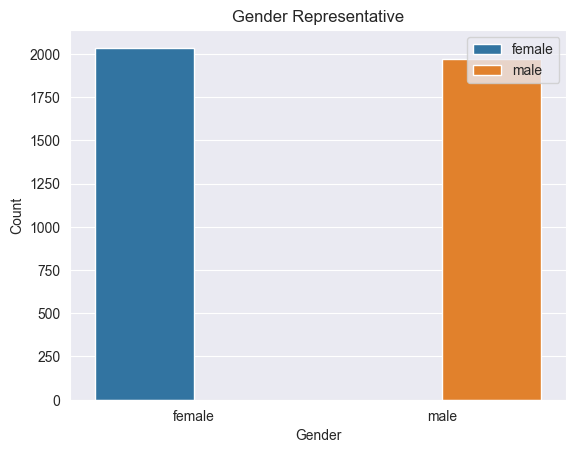

In [2]:


class Main:
        def __init__(self):
            self.df = pd.read_csv("HCMST.csv", low_memory=False)
            logging.info("loading csv as dataframe")
            self.df_numeric = pd.DataFrame()
            self.df_categorical = pd.DataFrame()
            self.df_categorical_encoded = pd.DataFrame()
            self.df_numeric_encoded = pd.DataFrame()

        def log_config(self):
            logger = logging.getLogger()
            logger.setLevel(logging.INFO)

            fh = logging.FileHandler("clean_data.log", "w")
            fh.setLevel(logging.INFO)
            logger.addHandler(fh)

            sh = logging.StreamHandler()
            sh.setLevel(logging.INFO)
            logger.addHandler(sh)

        def clean_data(self):
            logging.info(f"loading dataframe")
            # select only columns of interest
            self.df_numeric = self.df[
                ['caseid_new', 'ppagecat', 'ppincimp']].rename(
                {'caseid_new': 'id',
                 'ppagecat': 'age',
                 'ppincimp': 'income'}, axis=1)
            self.df_categorical = self.df[['ppgender', 'ppeducat', 'ppwork',
                                           'pppartyid3', 'ppreg9',
                                           'ppmarit', 'q24_met_online',
                                           'relationship_quality']]
            self.df_numeric_encoded = pd.get_dummies(self.df_numeric)
            self.df_categorical_encoded = pd.get_dummies(self.df_categorical)
            print(self.df_categorical_encoded.head())
            print(self.df_numeric_encoded.head())
            print(self.df_categorical_encoded.describe())
            print(self.df_numeric_encoded.describe())
            # cleaning null
            print(self.df_categorical.isnull().sum())
            print(self.df_numeric.isnull().sum())

        def viz(self):
            female_count = \
            self.df_categorical_encoded['ppgender_female'].value_counts()[
                self.df_categorical_encoded['ppgender_female'] == 1].values[0]
            male_count = \
            self.df_categorical_encoded['ppgender_female'].value_counts()[
                self.df_categorical_encoded['ppgender_female'] == 1].values[1]
            gender = pd.DataFrame({'gender': ['female', 'male'],
                                   'count': [female_count, male_count]})
            sns.barplot(x=gender['gender'], y=gender['count'], data=gender,
                        hue='gender')
            plt.xlabel('Gender')
            plt.ylabel('Count')
            plt.title('Gender Representative')
            plt.legend()
            plt.show()


if __name__ == '__main__':
    m = Main()
    m.log_config()
    m.clean_data()
    m.viz()